In [2]:
import pandas as pd
import numpy as np

In [3]:
base = pd.read_csv('Raw-Data.csv')

In [4]:
base.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN


In [5]:
base_cleaned = pd.read_csv('Cleaned-Data.csv')

In [6]:
base_cleaned.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [7]:
print(base.shape, base_cleaned.shape)

(16, 7) (316800, 27)


In [8]:
pd.DataFrame(np.unique(base_cleaned.Country, return_counts=True))

,0,1,2,3,4,5,6,7,8,9
0,China,France,Germany,Iran,Italy,Other,Other-EUR,Republic of Korean,Spain,UAE
1,31680,31680,31680,31680,31680,31680,31680,31680,31680,31680


In [9]:
# UNir os dados de serveridade para poder usar como classificador.

In [10]:
join_columns = ['Severity_Severe', 'Severity_Moderate', 'Severity_Mild' ,'Severity_None']

# Join columns to use classifier
def join_dummies(df, columns, new_column_name='Join_columns'):
    join_columns = df[columns]
    new_df = []
    for i in range(len(join_columns)):
        ind = join_columns.iloc[i].idxmax()
        new_df.append(ind)

    df[new_column_name] = new_df

join_dummies(base_cleaned, join_columns, new_column_name='Severity')

In [11]:
# Testar se todos so possuem um mesmo (Medo dos dados terem problemas)
df = base_cleaned[join_columns]
for i in range(len(base_cleaned)):
    s = df.iloc[i].sum()
    if s != 1:
        print(df.iloc[i])

In [12]:
base_cleaned.Severity.value_counts()

Severity_Mild        79200
Severity_None        79200
Severity_Moderate    79200
Severity_Severe      79200
Name: Severity, dtype: int64

In [13]:
severity_base = base_cleaned.drop(join_columns, axis=1)
pd.set_option('display.max_columns', None)
severity_base.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,China,Severity_Mild
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,China,Severity_Mild
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,China,Severity_Mild
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,China,Severity_Moderate
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,China,Severity_Moderate


In [14]:
# Separar dados de teste e treino

In [15]:
# Categorical Encode
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Severity', 'Country'], return_df=True)
encoder.fit(severity_base)

/home/beloin/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


OrdinalEncoder(cols=['Severity', 'Country'],
               mapping=[{'col': 'Severity', 'data_type': dtype('O'),
                         'mapping': Severity_Mild        1
Severity_Moderate    2
Severity_Severe      3
Severity_None        4
NaN                 -2
dtype: int64},
                        {'col': 'Country', 'data_type': dtype('O'),
                         'mapping': China                  1
Italy                  2
Iran                   3
Republic of Korean     4
France                 5
Spain                  6
Germany                7
UAE                    8
Other-EUR              9
Other                 10
NaN                   -2
dtype: int64}])

In [16]:
encoded_base = encoder.transform(severity_base)
encoded_base

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,2
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,10,3
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,10,3
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,10,4
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,10,4


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

no_country_base = severity_base.drop('Country',axis=1)
X = no_country_base.iloc[:,:22]
y = no_country_base.iloc[:,22]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

no_country_encoded_base = encoded_base.drop('Country',axis=1)
X_encoded = no_country_encoded_base.iloc[:,:22]
y_encoded = no_country_encoded_base.iloc[:,22]

X_encoded_train, X_encoded_test, y_encoded_train, y_encoded_test = train_test_split(X_encoded, y_encoded, test_size=.3)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)
cf_tree = confusion_matrix(y_test, pred_tree, )
acc_tree, cf_tree

(0.13135521885521886,
 array([[5033, 7984, 5856, 4763],
        [9586, 3331, 5976, 4746],
        [9608, 7149, 2363, 4743],
        [9744, 7170, 5231, 1757]]))

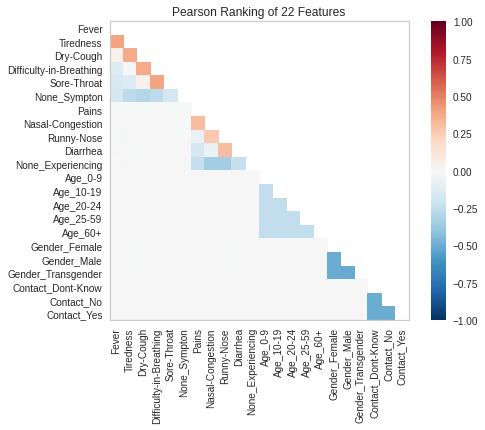

<AxesSubplot:title={'center':'Pearson Ranking of 22 Features'}>

In [18]:
from yellowbrick.features import Rank2D
pvc = Rank2D(features=X_encoded.columns, algorithm='pearson')
pvc.fit(X_encoded, y_encoded)
pvc.transform(X_encoded)
pvc.poof()

In [19]:
def test_model(model, x, y, x_test, y_test):
    model.fit(x, y)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    cf = confusion_matrix(y_test, pred)
    return acc, cf

In [20]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()

test_model(gaussian_model, X_encoded_train, y_encoded_train, X_encoded_test, y_encoded_test)

(0.24339225589225588,
 array([[5243, 7732, 4819, 5933],
        [5451, 7431, 4850, 5959],
        [5438, 7691, 4698, 5915],
        [5535, 7713, 4872, 5760]]))

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
test_model(random_model, X_encoded_train, y_encoded_train, X_encoded_test, y_encoded_test)

(0.1310185185185185,
 array([[3162, 6907, 6839, 6819],
        [6995, 3076, 6801, 6819],
        [6918, 6837, 3090, 6897],
        [7063, 6846, 6847, 3124]]))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
test_model(knn_model, X_encoded_train, y_encoded_train, X_encoded_test, y_encoded_test)

(0.21600378787878788,
 array([[7288, 7265, 5228, 3946],
        [8594, 5821, 5273, 4003],
        [8578, 6918, 4281, 3965],
        [8783, 6867, 5091, 3139]]))

In [23]:
len(X.columns)

22

In [24]:
y_encoded_train

190292    3
254624    3
50117     2
55449     4
293135    4
         ..
87417     4
228059    4
226675    3
144431    4
248202    3
Name: Severity, Length: 221760, dtype: int64

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_dim = len(X.columns)
input_dim

opt = Adam(learning_rate=0.03)

replace_dic = {1:0, 2:1, 3:2, 4:3}
y_ann = np.array(y_encoded_train)
for k, v in replace_dic.items():
    y_ann[y_ann == k] = v    


ann_model = Sequential()
ann_model.add(Dense(10, input_dim=input_dim, activation='relu'))
ann_model.add(Dense(12, activation='relu'))
ann_model.add(Dense(4, activation='softmax'))
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
ann_model.fit(X_encoded_train, y_ann, epochs=10, batch_size=20)

Epoch 1/10
11088/11088 [==============================] - 18s 2ms/step - loss: 1.3893 - accuracy: 0.2486
Epoch 2/10
11088/11088 [==============================] - 20s 2ms/step - loss: 1.3890 - accuracy: 0.2494
Epoch 3/10
11088/11088 [==============================] - 18s 2ms/step - loss: 1.3893 - accuracy: 0.2503
Epoch 4/10
11088/11088 [==============================] - 13s 1ms/step - loss: 1.3892 - accuracy: 0.2502
Epoch 5/10
11088/11088 [==============================] - 13s 1ms/step - loss: 1.3891 - accuracy: 0.2505
Epoch 6/10
11088/11088 [==============================] - 12s 1ms/step - loss: 1.3892 - accuracy: 0.2497
Epoch 7/10
11088/11088 [==============================] - 13s 1ms/step - loss: 1.3890 - accuracy: 0.2504
Epoch 8/10
11088/11088 [==============================] - 13s 1ms/step - loss: 1.3892 - accuracy: 0.2508
Epoch 9/10
11088/11088 [==============================] - 14s 1ms/step - loss: 1.3891 - accuracy: 0.2493
Epoch 10/10
11088/11088 [==============================

This analyze lead to no good. In the other document I will try to use only one severity (Using None, to say "You don't have nothing to worry about")

In [26]:
ann_model.save('my_model.h5')

In [49]:
pred_values = {'Fever': 0,
               'Tiredness': 0,
               'Dry-Cough': 0,
               'Difficulty-in-Breathing': 0,
               'Sore-Throat': 0,
               'None_Sympton': 0,
               'Pains': 0,
               'Nasal-Congestion': 0,
               'Runny-Nose': 0,
               'Diarrhea': 0,
               'None_Experiencing': 0,
               'Age_0-9': 0,
               'Age_10-19': 0,
               'Age_20-24': 0,
               'Age_25-59': 0,
               'Age_60+': 0,
               'Gender_Female': 0,
               'Gender_Male': 0,
               'Gender_Transgender': 0,
               'Contact_Dont-Know':0,
               'Contact_No': 0,
               'Contact_Yes': 0
               }

arr = np.array(list(pred_values.values())).reshape((1, -1))

ann_model.predict(arr)

array([[0.2765756 , 0.25040895, 0.21585886, 0.25715664]], dtype=float32)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])